In [2]:
%matplotlib inline

In [3]:
import os
import numpy as np
import pandas as pd
from ggplot import *
from scipy.stats import ttest_ind

In [4]:
csv_fn='/Shared/johnsonhj/HDNI/20160804_HCP_Processing_Pipeline/Stats_CSVs/bhattacharyya_coefs_all.csv'
DataFrame = pd.read_csv(csv_fn)

In [5]:
#myDataFrame = DataFrame
myDataFrame = DataFrame.loc[(DataFrame.method == 'TV') | (DataFrame.method == 'WTV')]

/IPLlinux/raid0/homes/aghayoor/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


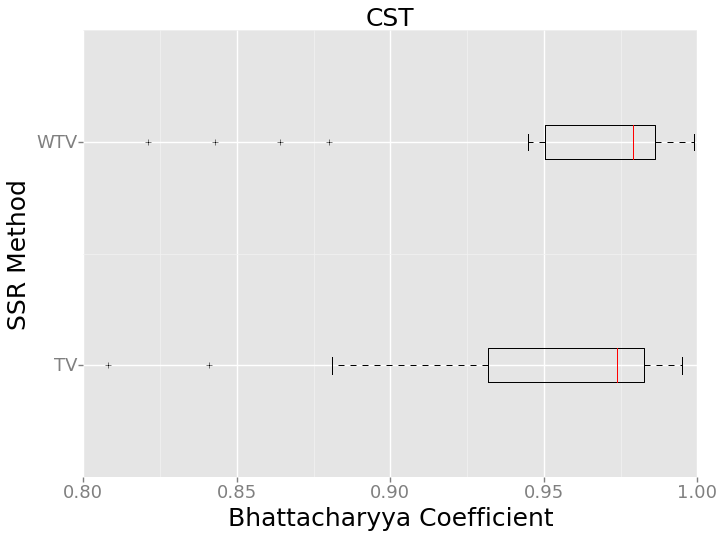

<ggplot: (297074101)>


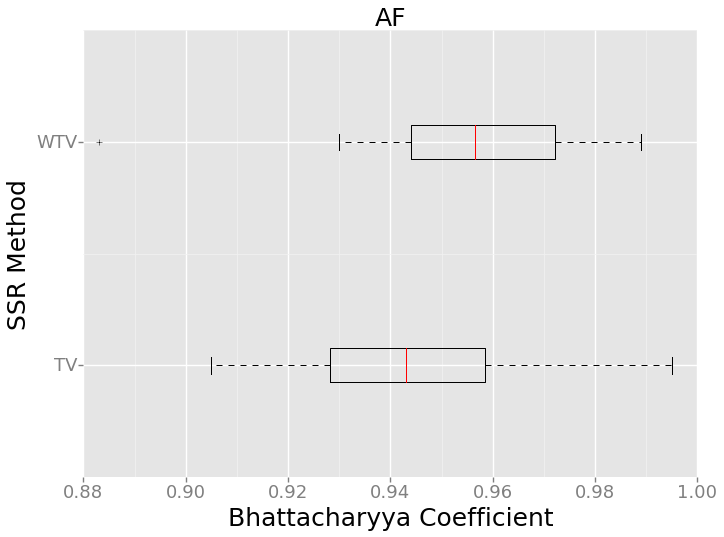

<ggplot: (280152253)>


In [6]:
df1 = myDataFrame.loc[(DataFrame.roi == 'cst_right')]
p1 = ggplot(df1, aes('Bhattacharyya_Coef', 'method')) + geom_boxplot() \
+ labs(x='Bhattacharyya Coefficient', y="SSR Method", title='CST') \
+ theme(axis_title=element_text(size=25),axis_text=element_text(size=18),title=element_text(size=25))
print(p1)

# df2 = myDataFrame.loc[(DataFrame.roi == 'cst_left_top')]
# p2 = ggplot(df2, aes(x='Bhattacharyya_Coef', y='method')) + geom_boxplot() \
# + labs(x='Bhattacharyya Coefficient', y="SSR Method", title='CST (top %20)') \
# + theme(axis_title=element_text(size=25),axis_text=element_text(size=18),title=element_text(size=25))
# print(p2)

df3 = myDataFrame.loc[(DataFrame.roi == 'af')]
p3 = ggplot(df3, aes(x='Bhattacharyya_Coef', y='method')) + geom_boxplot() \
+ labs(x='Bhattacharyya Coefficient', y="SSR Method", title='AF') \
+ theme(axis_title=element_text(size=25),axis_text=element_text(size=18),title=element_text(size=25))
print(p3)

In [7]:
# Now try to find p values

In [8]:
# for cst

In [9]:
df_cst_wtv = DataFrame.loc[(DataFrame.roi == 'cst_right') & (DataFrame.method == 'WTV')]
cst_wtv_array = df_cst_wtv[['Bhattacharyya_Coef']].values

df_cst_tv = DataFrame.loc[(DataFrame.roi == 'cst_right') & (DataFrame.method == 'TV')]
cst_tv_array = df_cst_tv[['Bhattacharyya_Coef']].values

In [10]:
# print(cst_wtv_array)
# print('----')
# print(cst_tv_array)

In [11]:
t, p = ttest_ind(cst_wtv_array, cst_tv_array)
print(p)

[ 0.83491142]


In [12]:
# for af

In [13]:
df_af_wtv = DataFrame.loc[(DataFrame.roi == 'af') & (DataFrame.method == 'WTV')]
af_wtv_array = df_af_wtv[['Bhattacharyya_Coef']].values

df_af_tv = DataFrame.loc[(DataFrame.roi == 'af') & (DataFrame.method == 'TV')]
af_tv_array = df_af_tv[['Bhattacharyya_Coef']].values

In [14]:
# print(af_wtv_array)
# print('----')
# print(af_tv_array)

In [15]:
t, p = ttest_ind(af_wtv_array, af_tv_array)
print(p)

[ 0.28172914]


# Error Images

In [57]:
csv_fn='/Shared/johnsonhj/HDNI/20160804_HCP_Processing_Pipeline/Stats_CSVs/error_mean_values_all.csv'
DataFrame = pd.read_csv(csv_fn)

In [58]:
myDataFrame = DataFrame

In [107]:
# change these
errorImage='Reimann'
#errorImage='FA'
#brainlobe='frontal'
brainlobe='occipital'
#

In [108]:
roi1=brainlobe
roi2=brainlobe+'_pure'
roi3=brainlobe+'_NOTpure'

In [109]:
if errorImage=='FA':
    xlim1=0.02
    xlim2=0.09
elif errorImage=='Reimann':
    xlim1=0.1
    xlim2=0.35

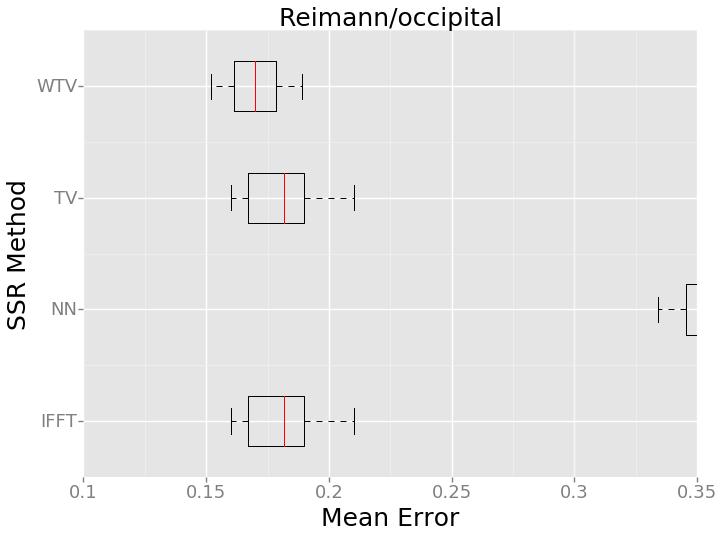

<ggplot: (296554097)>


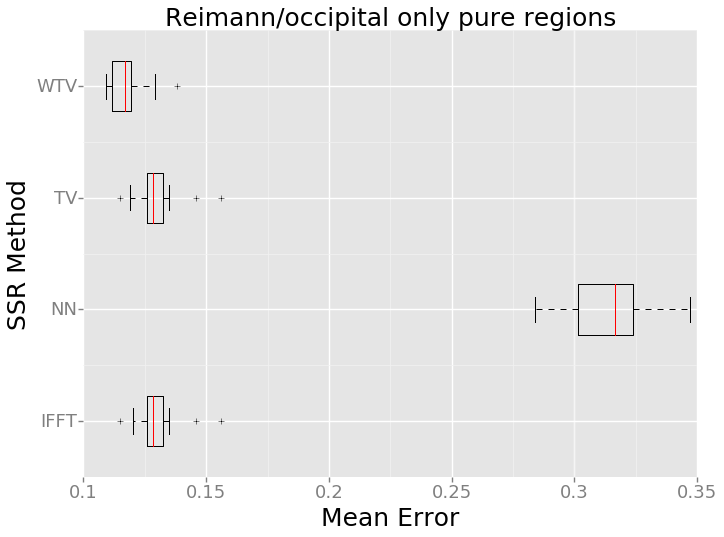

<ggplot: (296709617)>


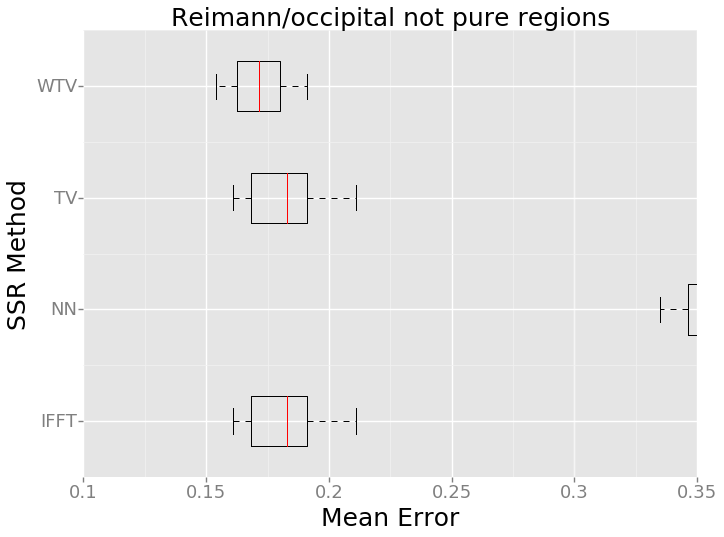

<ggplot: (276659345)>


In [110]:
fig_title=errorImage + '/' + brainlobe
df1 = myDataFrame.loc[(DataFrame.error_image == errorImage) & (DataFrame.roi == roi1)]
p1 = ggplot(df1, aes(x='error_mean_value', y='method')) + geom_boxplot() \
+ labs(x='Mean Error', y="SSR Method", title=fig_title) \
+ theme(axis_title=element_text(size=25),axis_text=element_text(size=18),title=element_text(size=25)) \
+ xlim(xlim1, xlim2)
print(p1)



fig_title=errorImage + '/' + brainlobe + ' only pure regions'
df2 = myDataFrame.loc[(DataFrame.error_image == errorImage) & (DataFrame.roi == roi2)]
p2 = ggplot(df2, aes(x='error_mean_value', y='method')) + geom_boxplot() \
+ labs(x='Mean Error', y="SSR Method", title=fig_title) \
+ theme(axis_title=element_text(size=25),axis_text=element_text(size=18),title=element_text(size=25)) \
+ xlim(xlim1, xlim2)
print(p2)



fig_title=errorImage + '/' + brainlobe + ' not pure regions'
df3 = myDataFrame.loc[(DataFrame.error_image == errorImage) & (DataFrame.roi == roi3)]
p3 = ggplot(df3, aes(x='error_mean_value', y='method')) + geom_boxplot() \
+ labs(x='Mean Error', y="SSR Method", title=fig_title) \
+ theme(axis_title=element_text(size=25),axis_text=element_text(size=18),title=element_text(size=25)) \
+ xlim(xlim1, xlim2)
print(p3)

In [123]:
df1_wtv = DataFrame.loc[(DataFrame.roi == roi1) & (DataFrame.error_image == errorImage) & (DataFrame.method == 'WTV')]
wtv_array1 = df1_wtv[['error_mean_value']].values

df1_tv = DataFrame.loc[(DataFrame.roi == roi1) & (DataFrame.error_image == errorImage) & (DataFrame.method == 'TV')]
tv_array1 = df1_tv[['error_mean_value']].values

df1_ifft = DataFrame.loc[(DataFrame.roi == roi1) & (DataFrame.error_image == errorImage) & (DataFrame.method == 'IFFT')]
ifft_array1 = df1_ifft[['error_mean_value']].values

t, p = ttest_ind(wtv_array1, tv_array1)
print('p value for {0}: {1}'.format(roi1,p))

p value for occipital: [ 0.00965862]


In [124]:
df2_wtv = DataFrame.loc[(DataFrame.roi == roi2) & (DataFrame.error_image == errorImage) & (DataFrame.method == 'WTV')]
wtv_array2 = df2_wtv[['error_mean_value']].values

df2_tv = DataFrame.loc[(DataFrame.roi == roi2) & (DataFrame.error_image == errorImage) & (DataFrame.method == 'TV')]
tv_array2 = df2_tv[['error_mean_value']].values

df2_ifft = DataFrame.loc[(DataFrame.roi == roi2) & (DataFrame.error_image == errorImage) & (DataFrame.method == 'IFFT')]
ifft_array2 = df2_ifft[['error_mean_value']].values

t, p = ttest_ind(wtv_array2, tv_array2)
print('p value for {0}: {1}'.format(roi2,p))

p value for occipital_pure: [  3.71518245e-05]


In [125]:
df3_wtv = DataFrame.loc[(DataFrame.roi == roi3) & (DataFrame.error_image == errorImage) & (DataFrame.method == 'WTV')]
wtv_array3 = df3_wtv[['error_mean_value']].values

df3_tv = DataFrame.loc[(DataFrame.roi == roi3) & (DataFrame.error_image == errorImage) & (DataFrame.method == 'TV')]
tv_array3 = df3_tv[['error_mean_value']].values

df3_ifft = DataFrame.loc[(DataFrame.roi == roi3) & (DataFrame.error_image == errorImage) & (DataFrame.method == 'IFFT')]
ifft_array3 = df3_ifft[['error_mean_value']].values

t, p = ttest_ind(wtv_array3, tv_array3)
print('p value for {0}: {1}'.format(roi3,p))

p value for occipital_NOTpure: [ 0.01014859]


In [126]:
print(abs(np.mean(wtv_array1)-np.mean(tv_array1)))
print(abs(np.mean(wtv_array2)-np.mean(tv_array2)))
print(abs(np.mean(wtv_array3)-np.mean(tv_array3)))

0.01125
0.01215
0.0112


In [127]:
print(np.mean(wtv_array3))
print(np.mean(tv_array3))

0.171
0.1822


In [128]:
print(abs(np.mean(ifft_array1)-np.mean(tv_array1)))
print(abs(np.mean(ifft_array2)-np.mean(tv_array2)))
print(abs(np.mean(ifft_array3)-np.mean(tv_array3)))

5e-05
0.00015
5e-05


In [116]:
# myDataFrame = DataFrame.loc[(DataFrame.roi == 'frontal') | (DataFrame.roi == 'frontal_pure') | (DataFrame.roi == 'frontal_NOTpure')]
# df1 = myDataFrame.loc[(DataFrame.error_image == 'FA')
#                      ]
# p1 = ggplot(df1, aes(x='error_mean_value', y='method', fill='roi')) + geom_boxplot() \
# + labs(x='Mean Error', y="SSR Method", title='FA/Frontal') \
# + theme(axis_title=element_text(size=25),axis_text=element_text(size=18),title=element_text(size=25))
# print(p1)

In [117]:
total_delta = abs(wtv_array1-tv_array1).flatten()
pure_delta = abs(wtv_array2-tv_array2).flatten()
notpure_delta = abs(wtv_array3-tv_array3).flatten()

In [118]:
print(total_delta)

[ 0.011  0.01   0.012  0.013  0.012  0.012  0.017  0.01   0.01   0.006
  0.011  0.008  0.005  0.02   0.007  0.021  0.013  0.01   0.01   0.007]


        X      Y
0   0.007  0.011
1   0.005  0.010
2   0.015  0.012
3   0.010  0.013
4   0.012  0.012
5   0.004  0.012
6   0.016  0.017
7   0.013  0.010
8   0.014  0.010
9   0.010  0.006
10  0.011  0.011
11  0.015  0.008
12  0.004  0.005
13  0.018  0.020
14  0.007  0.007
15  0.020  0.021
16  0.017  0.013
17  0.015  0.010
18  0.014  0.010
19  0.016  0.007


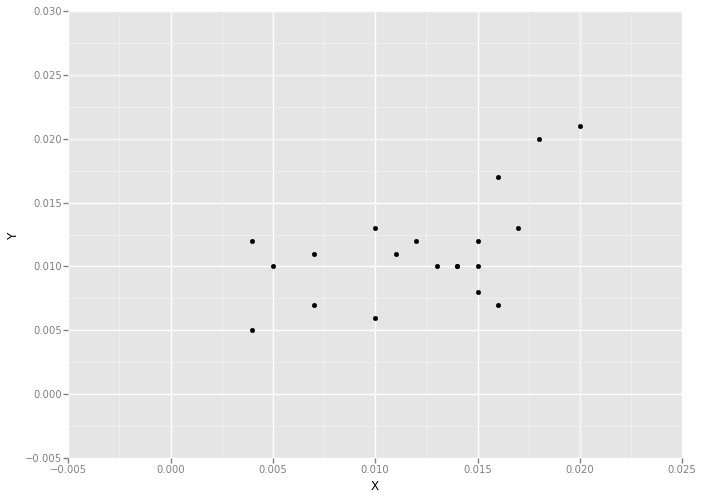

<ggplot: (299759733)>

In [119]:
DF_pure = pd.DataFrame(np.transpose([pure_delta, total_delta]))
DF_pure.rename(columns = lambda x: str(x), inplace=True)
DF_pure.rename(columns={"0": "X"}, inplace=True) # rename a dfcolumn   
DF_pure.rename(columns={"1": "Y"}, inplace=True) # rename a dfcolumn 
print(DF_pure)

ggplot(aes(x = 'X', y ='Y'),data=DF_pure) + \
    geom_point()

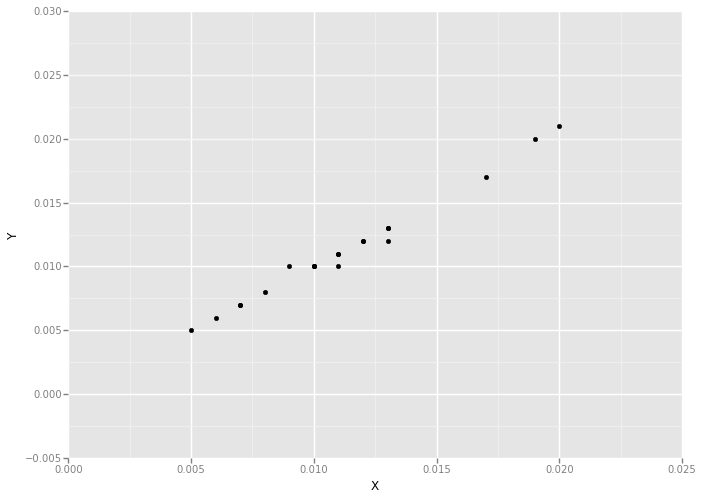

<ggplot: (296093233)>

In [120]:
DF_notpure = pd.DataFrame(np.transpose([notpure_delta, total_delta]))
DF_notpure.rename(columns = lambda x: str(x), inplace=True)
DF_notpure.rename(columns={"0": "X"}, inplace=True) # rename a dfcolumn   
DF_notpure.rename(columns={"1": "Y"}, inplace=True) # rename a dfcolumn 
DF_notpure

ggplot(aes(x = 'X', y ='Y'),data=DF_notpure) + \
    geom_point()

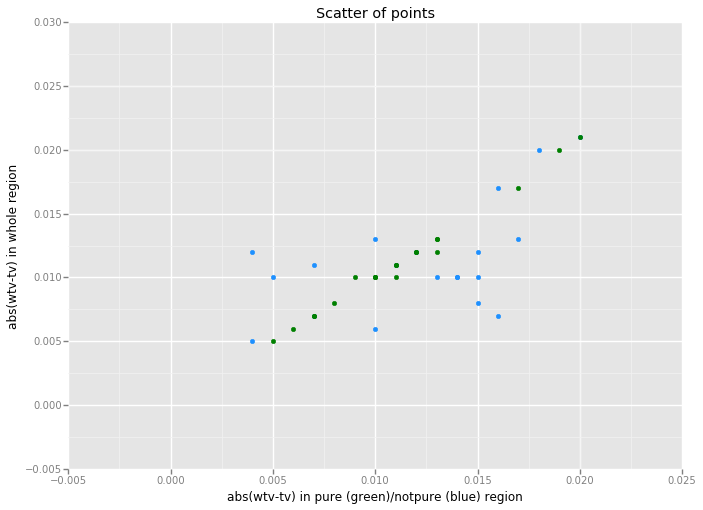

<ggplot: (299743565)>

In [121]:
ggplot(DF_pure, aes(x = 'X', y ='Y')) + \
    geom_point(alpha=1, color='dodgerblue') + \
    labs(x='abs(wtv-tv) in pure (green)/notpure (blue) region', y='abs(wtv-tv) in whole region', title='Scatter of points') + \
    geom_point(data = DF_notpure ,alpha=1, color='green')